# Exploratory Data Analysis

In [1]:
import pandas as pd

In [2]:
%time data = pd.read_csv("./restaurant-1-orders.csv", delimiter=",")

Wall time: 92.9 ms


In [3]:
data.sample(5)

,Order Number,Order Date,Item Name,Quantity,Product Price,Total products
40229,10952,31/08/2018 19:19,Sheek Kebab,1,4.95,7
57137,12280,01/12/2018 18:13,Korma - Chicken,1,8.95,6
19670,11974,10/11/2018 18:49,Paratha,1,2.95,4
66344,14362,16/04/2019 19:27,Lamb Balti,1,9.95,6
62773,5450,17/05/2017 19:07,Korma,1,8.95,4


In [4]:
data.describe()

,Order Number,Quantity,Product Price,Total products
count,74818.000000,74818.000000,74818.000000,74818.000000
mean,9115.638162,1.243564,5.286492,6.931434
std,4052.210452,0.798207,3.338221,3.954832
min,630.000000,1.000000,0.500000,1.000000
25%,5590.000000,1.000000,2.950000,5.000000
50%,9103.000000,1.000000,3.950000,6.000000
75%,12630.000000,1.000000,8.950000,8.000000
max,16118.000000,51.000000,17.950000,60.000000


In [5]:
total = data.isnull().sum().sort_values(ascending=False)

percent = (data.isnull().sum()/data.isnull().count()) \
.sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, \
                        keys=['Total', 'Missing Percent'])

missing_data['Missing Percent'] = \
missing_data['Missing Percent'].apply(lambda x: x*100)

missing_data.loc[missing_data['Missing Percent'] > 10] [:10]

,Total,Missing Percent


In [6]:
total

Total products    0
Product Price     0
Quantity          0
Item Name         0
Order Date        0
Order Number      0
dtype: int64

In [7]:
missing_data

,Total,Missing Percent
Total products,0,0.0
Product Price,0,0.0
Quantity,0,0.0
Item Name,0,0.0
Order Date,0,0.0
Order Number,0,0.0


In [8]:
missing_data.loc[missing_data['Missing Percent'] > 10] [:10]

,Total,Missing Percent


In [9]:
import pandas_profiling

In [10]:
data_resto = pd.read_csv('./restaurant-1-orders.csv')
profile = data_resto.profile_report(title='Pandas Profiling Report')
profile.to_file(output_file="resto_pandas_profiling.html")

### Seaborn

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

In [12]:
import seaborn as sns

In [13]:
restaurant = pd.read_csv('./restaurant-1-orders.csv', delimiter=',')

In [14]:
restaurant.shape

(74818, 6)

In [15]:
restaurant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74818 entries, 0 to 74817
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order Number    74818 non-null  int64  
 1   Order Date      74818 non-null  object 
 2   Item Name       74818 non-null  object 
 3   Quantity        74818 non-null  int64  
 4   Product Price   74818 non-null  float64
 5   Total products  74818 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 3.4+ MB


### Menganalisis Variabel Secara Individual

In [16]:
numerical_vars = ['Order Number','Order Date','Quantity','Product Price','Total products']
categorical_vars = ['Item Name']

In [17]:
restaurant = restaurant[numerical_vars+categorical_vars]

In [18]:
restaurant.shape

(74818, 6)

### Memahami Variabel Utama

In [19]:
restaurant['Item Name'].describe()

count          74818
unique           248
top       Pilau Rice
freq            4721
Name: Item Name, dtype: object

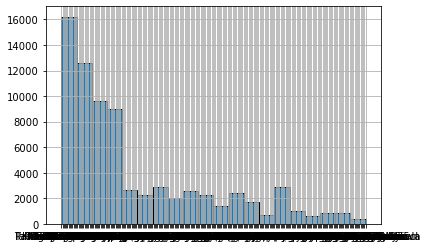

In [20]:
restaurant['Item Name'].hist(edgecolor='black',bins=20);

### Variabel Numerikal

In [21]:
restaurant[numerical_vars].describe()

,Order Number,Quantity,Product Price,Total products
count,74818.000000,74818.000000,74818.000000,74818.000000
mean,9115.638162,1.243564,5.286492,6.931434
std,4052.210452,0.798207,3.338221,3.954832
min,630.000000,1.000000,0.500000,1.000000
25%,5590.000000,1.000000,2.950000,5.000000
50%,9103.000000,1.000000,3.950000,6.000000
75%,12630.000000,1.000000,8.950000,8.000000
max,16118.000000,51.000000,17.950000,60.000000


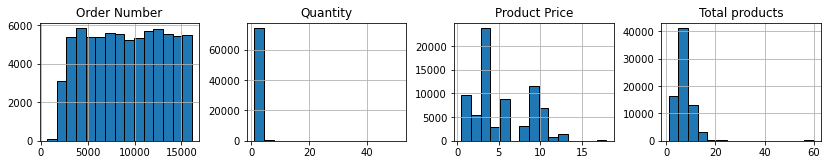

In [22]:
restaurant[numerical_vars].hist(edgecolor='black',bins=15, figsize=(14,5), layout=(2,4));

### Variabel Kategorikal

<AxesSubplot:title={'center':'Order Name'}>

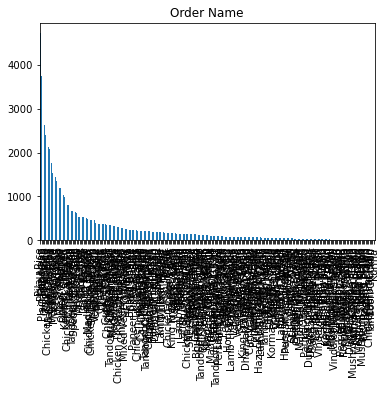

In [23]:
restaurant['Item Name'].value_counts().plot(kind='bar', title='Order Name')

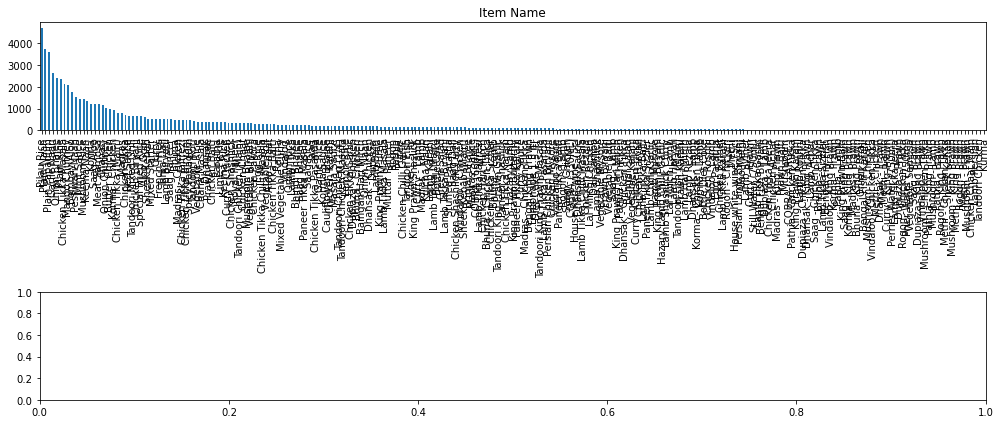

In [24]:
fig, ax = plt.subplots(2,1, figsize=(14,6))
for var, subplot in zip(categorical_vars, ax.flatten()):
    restaurant[var].value_counts().plot(kind='bar', ax=subplot, title=var)
    
fig.tight_layout()

In [25]:
def identify_cat_above50(series):
    counts = series.value_counts()
    return list(counts[counts>=50].index)

In [26]:
levels_to_keep = restaurant[categorical_vars].apply(identify_cat_above50, axis=0)
levels_to_keep

,Item Name
0,Pilau Rice
1,Plain Naan
2,Plain Papadum
3,Garlic Naan
4,Onion Bhajee
...,...
175,Chicken Roshni
176,Vindaloo - Lamb
177,Egg Paratha
178,Chicken Sylhet


In [27]:
for var in categorical_vars:
    restaurant = restaurant.loc[restaurant[var].isin(levels_to_keep[var])]

In [28]:
restaurant.shape

(73404, 6)

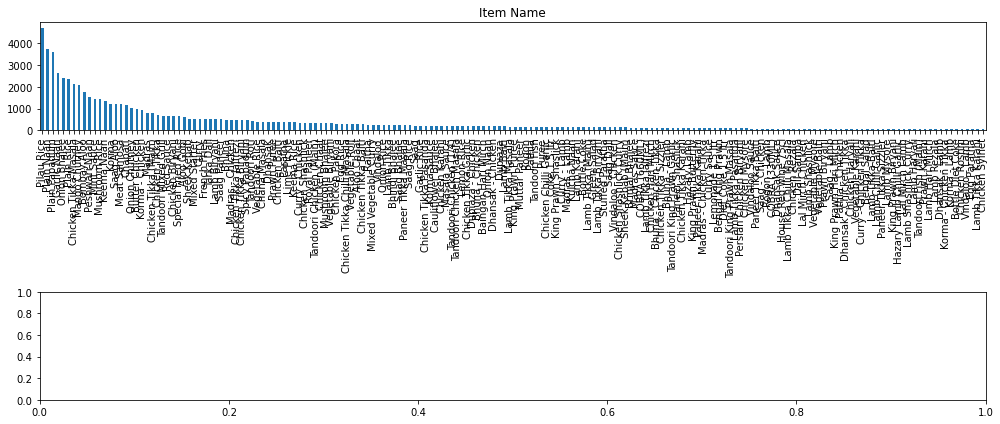

In [29]:
fig, ax = plt.subplots(2,1, figsize=(14,6))
for var, subplot in zip(categorical_vars, ax.flatten()):
    restaurant[var].value_counts().plot(kind='bar', ax=subplot, title=var)
    
fig.tight_layout()

## Hubungan antar Variabel dengan Scatter Plot

<AxesSubplot:xlabel='Total products', ylabel='Product Price'>

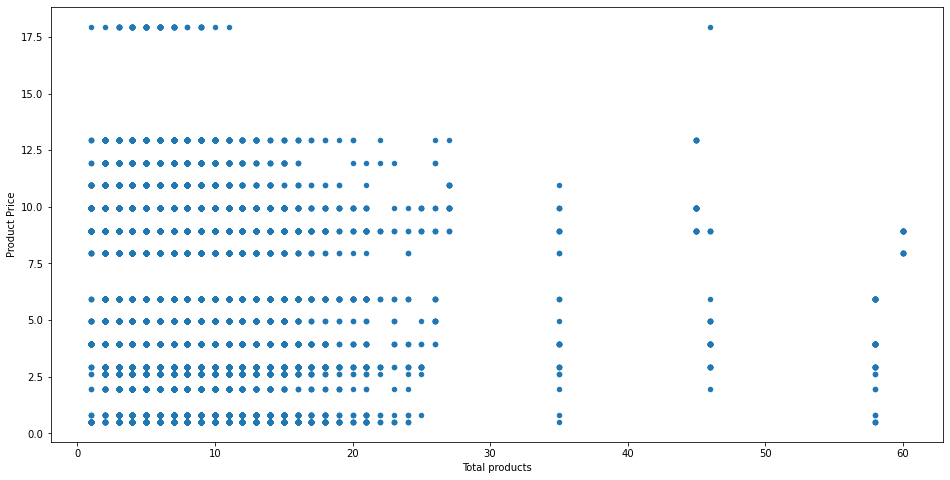

In [30]:
restaurant.plot.scatter(figsize=(16,8), x='Total products', y='Product Price')

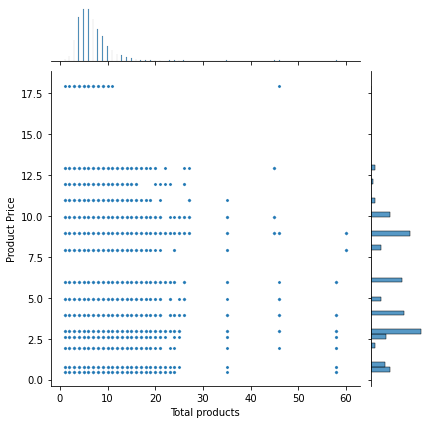

In [31]:
sns.jointplot(x='Total products', y='Product Price', data=restaurant, joint_kws={"s": 10});

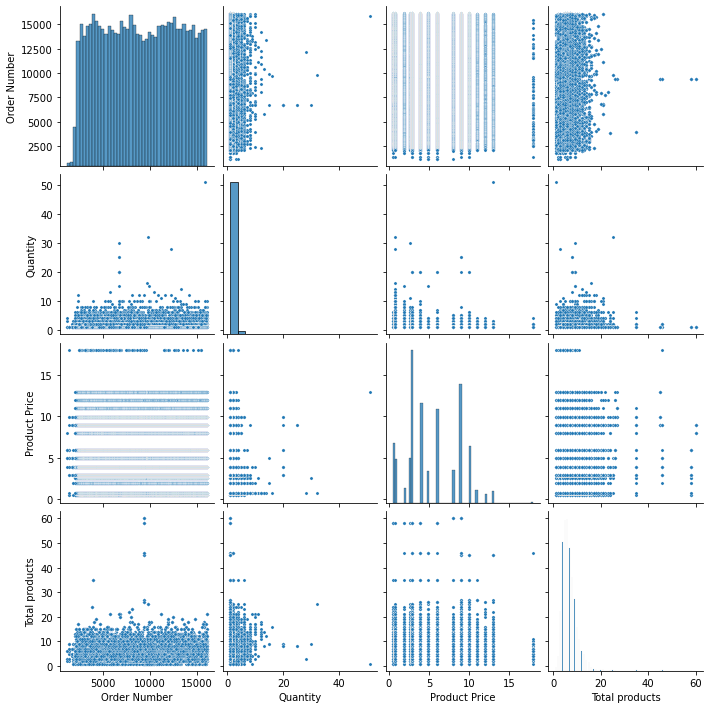

In [32]:
sns.pairplot(restaurant[numerical_vars[:5]],plot_kws={"s":10});

In [33]:
restaurant[numerical_vars].corr()

,Order Number,Quantity,Product Price,Total products
Order Number,1.000000,0.000145,-0.013733,-0.035920
Quantity,0.000145,1.000000,-0.226458,0.073138
Product Price,-0.013733,-0.226458,1.000000,-0.100285
Total products,-0.035920,0.073138,-0.100285,1.000000


In [34]:
restaurant[numerical_vars].corr()['Product Price'].sort_values(ascending=False)

Product Price     1.000000
Order Number     -0.013733
Total products   -0.100285
Quantity         -0.226458
Name: Product Price, dtype: float64

In [35]:
correlations = restaurant[numerical_vars].corr()

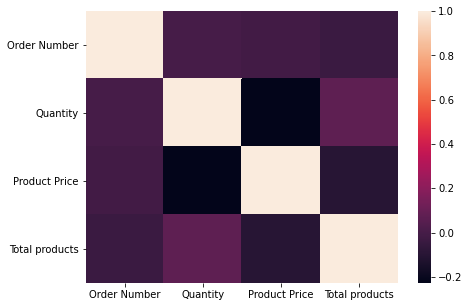

In [36]:
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(correlations, ax=ax);

## Hubungan Antara Variabel dengan Bloxpot

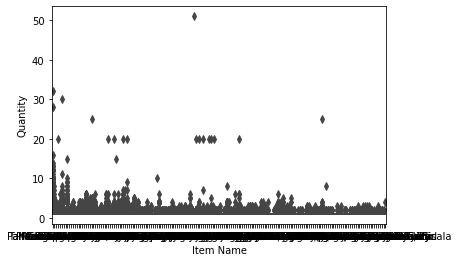

In [37]:
sns.boxplot(x='Item Name', y='Quantity', data=restaurant);

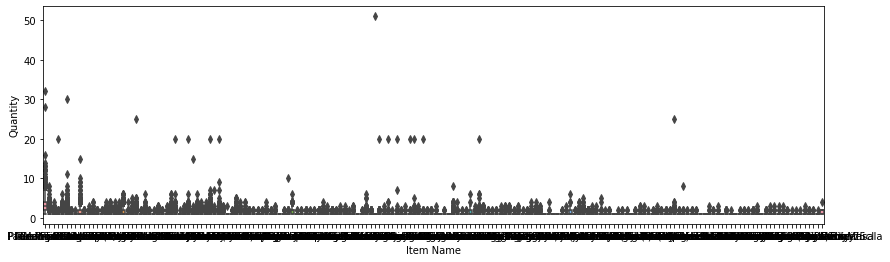

In [38]:
fig, ax = plt.subplots(figsize=(14,4))
sns.boxplot(x='Item Name', y='Quantity', data=restaurant, ax=ax);

In [39]:
sorted_nb = restaurant.groupby('Item Name')['Quantity'].median().sort_values().index.values

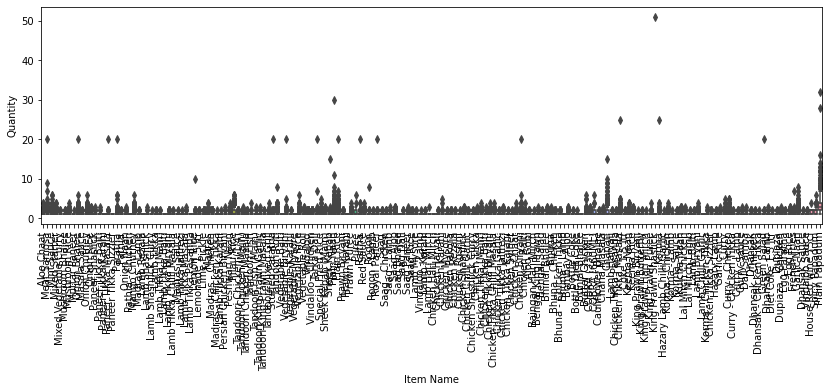

In [40]:
fig, ax = plt.subplots(figsize=(14,4))
sns.boxplot(x='Item Name', y='Quantity', data=restaurant, order=sorted_nb, ax=ax)
plt.xticks(rotation='vertical');

# Association Analysis

In [41]:
import os 
import sys
import pandas as pd

In [42]:
restaurant = pd.read_csv("./restaurant-1-orders.csv", delimiter=",")

In [43]:
restaurant[:10]

,Order Number,Order Date,Item Name,Quantity,Product Price,Total products
0,16118,03/08/2019 20:25,Plain Papadum,2,0.80,6
1,16118,03/08/2019 20:25,King Prawn Balti,1,12.95,6
2,16118,03/08/2019 20:25,Garlic Naan,1,2.95,6
3,16118,03/08/2019 20:25,Mushroom Rice,1,3.95,6
4,16118,03/08/2019 20:25,Paneer Tikka Masala,1,8.95,6
5,16118,03/08/2019 20:25,Mango Chutney,1,0.50,6
6,16117,03/08/2019 20:17,Plain Naan,1,2.60,7
7,16117,03/08/2019 20:17,Mushroom Rice,1,3.95,7
8,16117,03/08/2019 20:17,Tandoori Chicken (1/4),1,4.95,7
9,16117,03/08/2019 20:17,Vindaloo - Lamb,1,7.95,7


## Data Preprocessing

In [44]:
restaurant["Favorite"] = restaurant["Total products"] > 5

In [45]:
restaurant[10:20]

,Order Number,Order Date,Item Name,Quantity,Product Price,Total products,Favorite
10,16117,03/08/2019 20:17,Chapati,1,1.95,7,True
11,16117,03/08/2019 20:17,Lamb Tikka,1,4.95,7,True
12,16117,03/08/2019 20:17,Saag Paneer,1,5.95,7,True
13,16116,03/08/2019 20:09,Aloo Chaat,1,4.95,5,False
14,16116,03/08/2019 20:09,Chicken Pakora,1,5.95,5,False
15,16116,03/08/2019 20:09,Chicken Chilli Garlic,1,9.95,5,False
16,16116,03/08/2019 20:09,Lamb Biryani,1,9.95,5,False
17,16116,03/08/2019 20:09,Keema Naan,1,2.95,5,False
18,16115,03/08/2019 20:01,Chicken Pakora,1,5.95,7,True
19,16115,03/08/2019 20:01,Plain Papadum,1,0.80,7,True


# IMPLEMENTATION

In [46]:
pip install mlxtend


The following command must be run outside of the IPython shell:

    $ pip install mlxtend

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [47]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns', 10)

In [48]:
frequent_itemsets = {}

In [49]:
min_support = 0.03

In [50]:
metric = "lift"  # confident rule = 50%
min_threshold_for_metric = 1

In [51]:
asosiasi = (
    data.groupby([
        'Order Number', 'Item Name'
    ])['Quantity'].sum()  
    .unstack().reset_index()  # Transformasi
    .fillna(0)  # nilai null diisi 0
    .set_index('Order Number')  # men-set Order ID sebagai index
)

In [52]:
print("One order per row with the quantity of each product")
asosiasi.head()

One order per row with the quantity of each product


Item Name,Aloo Chaat,Aloo Gobi,Aloo Methi,Baingan Hari Mirch,Bengal Fish Biryani,...,Vindaloo - Chicken Tikka,Vindaloo - King Prawn,Vindaloo - Lamb,Vindaloo - Prawn,Vindaloo Sauce
Order Number,,,,,,,,,,,
630,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
647,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
648,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
651,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
764,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0


In [53]:
asosiasi_boolean_set = asosiasi.applymap(lambda quantity: 1 if int(quantity) >= 1 else 0)

print("Mengubah quantity kedalam  nilai boolean  ")
asosiasi_boolean_set.head()

Mengubah quantity kedalam  nilai boolean  


Item Name,Aloo Chaat,Aloo Gobi,Aloo Methi,Baingan Hari Mirch,Bengal Fish Biryani,...,Vindaloo - Chicken Tikka,Vindaloo - King Prawn,Vindaloo - Lamb,Vindaloo - Prawn,Vindaloo Sauce
Order Number,,,,,,,,,,,
630,0,0,0,0,0,...,0,0,0,0,0
647,0,0,0,0,0,...,0,0,0,0,0
648,0,0,0,0,0,...,0,0,0,0,0
651,0,0,0,0,0,...,0,0,0,0,0
764,0,0,0,0,0,...,0,0,0,0,0


In [54]:
frequent_itemsets = apriori(asosiasi_boolean_set, min_support=min_support, use_colnames=True)

print("\nFrequent itemsets menggunakan apriori dan minimun support sebesar  %.2f persen" % (min_support*100))
frequent_itemsets.head(10)


Frequent itemsets menggunakan apriori dan minimun support sebesar  3.00 persen


,support,itemsets
0,0.045906,(Aloo Gobi)
1,0.034784,(Bhuna)
2,0.130776,(Bombay Aloo)
3,0.073151,(Butter Chicken)
4,0.087333,(Chapati)
5,0.048593,(Chicken Biryani)
6,0.051653,(Chicken Tikka)
7,0.060088,(Chicken Tikka (Main))
8,0.034635,(Chicken Tikka Biryani)
9,0.034784,(Chicken Tikka Jalfrezi)


In [55]:
keranjang = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
keranjang.head(100)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Chicken Tikka Masala),(Bombay Aloo),0.159215,0.130776,0.031126,0.195499,1.494922,0.010305,1.080452
1,(Bombay Aloo),(Chicken Tikka Masala),0.130776,0.159215,0.031126,0.238014,1.494922,0.010305,1.103413
2,(Mango Chutney),(Bombay Aloo),0.154438,0.130776,0.030380,0.196713,1.504206,0.010183,1.082085
3,(Bombay Aloo),(Mango Chutney),0.130776,0.154438,0.030380,0.232306,1.504206,0.010183,1.101432
4,(Onion Bhajee),(Bombay Aloo),0.179219,0.130776,0.030380,0.169513,1.296211,0.006942,1.046644
...,...,...,...,...,...,...,...,...,...
95,(Pilau Rice),(Saag Aloo),0.352392,0.089124,0.039039,0.110782,1.242999,0.007632,1.024355
96,(Plain Naan),(Plain Papadum),0.280063,0.268418,0.084795,0.302772,1.127985,0.009621,1.049272
97,(Plain Papadum),(Plain Naan),0.268418,0.280063,0.084795,0.315907,1.127985,0.009621,1.052396
98,(Plain Naan),(Plain Rice),0.280063,0.176831,0.068150,0.243337,1.376101,0.018626,1.087894


In [56]:
#dilakukan filter yang memiliki lift >= 3 dan confidence >= 0.8 
keranjang[(keranjang['lift'] >=3) &
       (keranjang['confidence'] >=0.8)]
#dilihat dari hasil rule nya ada kemungkinan kalau bombay aloo min sauce dan plain papadium akan dibeli secara bersamaan

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
118,"(Mango Chutney, Mint Sauce)",(Plain Papadum),0.053743,0.268418,0.046503,0.865278,3.223617,0.032077,5.430297
130,"(Mango Chutney, Onion Chutney)",(Plain Papadum),0.043666,0.268418,0.036799,0.842735,3.139633,0.025078,4.651905
148,"(Mint Sauce, Onion Chutney)",(Plain Papadum),0.035829,0.268418,0.031126,0.868750,3.236553,0.021509,5.573956
154,"(Mint Sauce, Pilau Rice)",(Plain Papadum),0.046428,0.268418,0.038367,0.826367,3.078652,0.025905,4.213369


In [57]:
# List Item
seluruh_item = list(data['Item Name'].unique())

# Tabel Asosisasi
associations = pd.DataFrame(index=seluruh_item, columns=seluruh_item)
associations.fillna(0, inplace=True)
associations.iloc[:5,:5]

,Plain Papadum,King Prawn Balti,Garlic Naan,Mushroom Rice,Paneer Tikka Masala
Plain Papadum,0,0,0,0,0
King Prawn Balti,0,0,0,0,0
Garlic Naan,0,0,0,0,0
Mushroom Rice,0,0,0,0,0
Paneer Tikka Masala,0,0,0,0,0


In [58]:
pesanan = data.groupby('Order Number')['Item Name'].apply(lambda x: ','.join(x)).reset_index()
pesanan.rename(columns={'Item Name': 'Order'}, inplace=True)
pesanan['Order'] = pesanan['Order'].str.split(',')
pesanan.head(20)

,Order Number,Order
0,630,[Onion Bhaji]
1,647,[Onion Bhaji]
2,648,[Onion Bhaji]
3,651,[Onion Bhaji]
4,764,[Onion Bhaji]
5,838,[Onion Bhaji]
6,840,[Onion Bhaji]
7,857,[Onion Bhaji]
8,874,[Onion Bhaji]
9,894,[Onion Bhaji]


In [59]:
# Popular la tabla
for pesanan in pesanan['Order']:
    associations.loc[pesanan, pesanan] += 1

In [60]:
associations.iloc[:4, :4]

,Plain Papadum,King Prawn Balti,Garlic Naan,Mushroom Rice
Plain Papadum,3596,4,712,495
King Prawn Balti,4,21,3,6
Garlic Naan,712,3,2628,367
Mushroom Rice,495,6,367,1452


In [62]:
item_freq = data.groupby('Item Name').agg({'Quantity': 'sum'})
item_freq = item_freq.sort_values(by=['Quantity'])
top_20 = item_freq.tail(20)

In [63]:
associations_top = associations.loc[list(top_20.index), list(top_20.index)]

for i in range(associations_top.shape[0]):
    for j in range(i, associations_top.shape[0]):
        associations_top.iloc[i, j] = 0
        
associations_top.iloc[:5, :5]

,Butter Chicken,Korma - Chicken,Saag Aloo,Onion Chutney,Korma
Butter Chicken,0,0,0,0,0
Korma - Chicken,70,0,0,0,0
Saag Aloo,92,106,0,0,0
Onion Chutney,113,50,139,0,0
Korma,46,0,151,75,0


<AxesSubplot:title={'center':'Common sold together items'}>

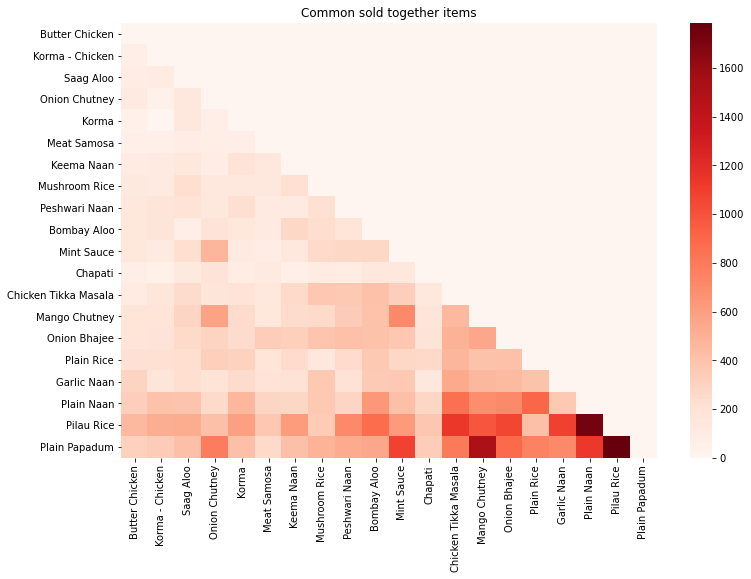

In [64]:
plt.figure(figsize=(12,8))
plt.title('Common sold together items')
sns.heatmap(associations_top, cmap="Reds", annot=False)

# Visualisasi Pasangan Data Menu dengan Bar Chart

In [65]:
number_keranjang_to_visualize = 3

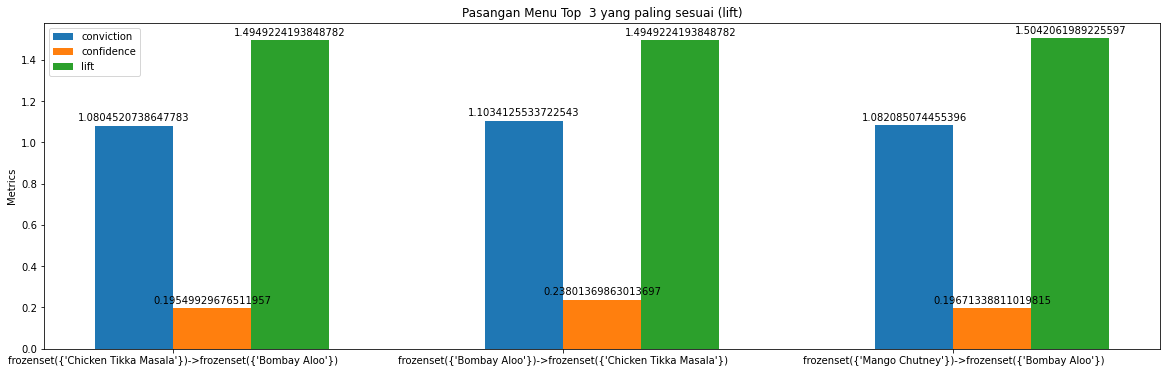

In [66]:
keranjang_top = keranjang.iloc[0:number_keranjang_to_visualize, :]
labels = ["->".join (map(str, keranjang)) for keranjang in keranjang_top.iloc[:, 0:2].values]  # berikan format teks {set1} -> {set2} untuk setiap label
x = np.arange(len(labels))  # lokasi labek
width = 0.2
fig, ax = plt.subplots(figsize=(20,6))
pasangan1 = ax.bar(x - width/2, keranjang_top['conviction'].values, width, label='conviction')
pasangan2 = ax.bar(x + width/2, keranjang_top['confidence'].values, width, label='confidence')
pasangan3 = ax.bar(x + width*1.5, keranjang_top['lift'].values, width, label='lift')
# Menambahkan teks untuk label, judul dan penamaan x-axis, dsb
ax.set_ylabel('Metrics')
ax.set_title('Pasangan Menu Top  ' + str(number_keranjang_to_visualize) + ' yang paling sesuai (' + metric +')')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()



def autolabel(pasangan):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for pasangan in pasangan:
        height = pasangan.get_height()
        ax.annotate('{}'.format(height),
                    xy=(pasangan.get_x() + pasangan.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(pasangan1)
autolabel(pasangan2)
autolabel(pasangan3)

mng = plt.get_current_fig_manager()
# mng.window.state('zoomed')  # maximize the screen in windows
plt.show()

## Evaluation

In [67]:
dr = restaurant[restaurant['Order Number'].isin(range(200))]

In [68]:
favorable_restaurant = dr[dr["Favorite"]]

In [69]:
favorable_reviews_by_users = dict((k, frozenset(v.values))
                                 for k, v in favorable_restaurant.groupby("Order Number")["Item Name"])

In [70]:
num_favorable_by_menu = restaurant[["Order Number", "Favorite"]].groupby("Order Number").sum()

In [71]:
num_favorable_by_menu.sort_values(by="Favorite", ascending=False).head()

,Favorite
Order Number,
9412,60
9414,58
9374,46
9411,45
3976,35


In [72]:
frequent_itemsets = {}

In [73]:
min_support = 0.03

In [74]:
frequent_itemsets = apriori(asosiasi_boolean_set, min_support=min_support, use_colnames=True)

print("\nFrequent itemsets menggunakan apriori dan minimun support sebesar  %.2f persen" % (min_support*100))
frequent_itemsets.head(10)


Frequent itemsets menggunakan apriori dan minimun support sebesar  3.00 persen


,support,itemsets
0,0.045906,(Aloo Gobi)
1,0.034784,(Bhuna)
2,0.130776,(Bombay Aloo)
3,0.073151,(Butter Chicken)
4,0.087333,(Chapati)
5,0.048593,(Chicken Biryani)
6,0.051653,(Chicken Tikka)
7,0.060088,(Chicken Tikka (Main))
8,0.034635,(Chicken Tikka Biryani)
9,0.034784,(Chicken Tikka Jalfrezi)


In [77]:
rule = association_rules(frequent_itemsets, metric="lift")
rule.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Chicken Tikka Masala),(Bombay Aloo),0.159215,0.130776,0.031126,0.195499,1.494922,0.010305,1.080452
1,(Bombay Aloo),(Chicken Tikka Masala),0.130776,0.159215,0.031126,0.238014,1.494922,0.010305,1.103413
2,(Mango Chutney),(Bombay Aloo),0.154438,0.130776,0.030380,0.196713,1.504206,0.010183,1.082085
3,(Bombay Aloo),(Mango Chutney),0.130776,0.154438,0.030380,0.232306,1.504206,0.010183,1.101432
4,(Onion Bhajee),(Bombay Aloo),0.179219,0.130776,0.030380,0.169513,1.296211,0.006942,1.046644


In [76]:
rule[(rule['lift'] >=3) &
       (rule['confidence'] >=0.8)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(Mango Chutney, Mint Sauce)",(Plain Papadum),0.053743,0.268418,0.046503,0.865278,3.223617,0.032077,5.430297
1,"(Mango Chutney, Onion Chutney)",(Plain Papadum),0.043666,0.268418,0.036799,0.842735,3.139633,0.025078,4.651905
2,"(Mint Sauce, Onion Chutney)",(Plain Papadum),0.035829,0.268418,0.031126,0.868750,3.236553,0.021509,5.573956
3,"(Mint Sauce, Pilau Rice)",(Plain Papadum),0.046428,0.268418,0.038367,0.826367,3.078652,0.025905,4.213369


Kesimpulan:

Berdasarkan implementasi di atas, maka terdapat beberapa hasil dari association rule pada restaurant ABC. Pada rule yang pertama yaitu menggunakan minimum support = 0.03, maka akan dihasilkan antecedents dan consequents seperti pada tabel yang pertama, contohnya antecedents-nya yaitu Chicken Tikka Masala dan consequents-nya yaitu Bombay Aloo.

Namun, apabila lift = 3 dan confidence = 0.8 seperti pada rule yang kedua, maka tabel yang akan dihasilkan juga akan berubah, terutama antecedents dan consequents-nya. Contohnya apabila user memesan Mango Chutney dan Mint Sauce, maka otomatis Plain Papadum juga akan dibeli secara bersamaan dengan kedua item tadi.